In [1]:
1

1

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [3]:
# load data with two year shift
data = pd.read_csv("dataCA/pr_CA.csv",index_col="MSN")
data


data2 = data.drop(['Data_Status', 'State'],axis=1)
data2
a = "1046492 1167142 1,192,848	1,189,801	1,148,722	1,220,587	1,202,586	1,154,079	1,196,279	1,290,698	1,226,364	1,192,869	1,232,826	1,226,313	1,227,952	1,304,360	1,217,724	1,308,727	1,359,856	1,420,797	1,367,856	1,367,567	1,355,310	1,354,131	1,369,438	1,325,392	1,361,384	1,358,381	1,486,214	1,485,795	1,426,721	1,417,985	1,425,659	1,455,716	1,489,320	1,449,101	1,488,574	1,474,374	1,511,586	1,483,981	1,466,657	1,500,559	1,437,024	1,440,463	1,355,028	1,347,770	1,367,103	1,415,455	1,440,273	1,455,751	1,507,721"
a = a.split()
a = a[:]
Resid_total = pd.DataFrame(a)
Resid_total = Resid_total.T
Resid_total.rename(index={0:"ResidCA"},inplace=True)
Resid_total
Resid_total.columns = data2.columns
data3 = pd.concat([data2,Resid_total])

a = "13,728,645	14,210,554	14,861,651	14,919,481	14,651,895	14,814,536	15,417,206	15,663,022	16,143,315	15,813,447	15,731,634	15,247,535	15,497,034	15,399,060	15,920,721	16,041,775	15,951,750	16,228,823	17,132,762	17,775,513	16,930,638	17,401,226	17,331,937	18,209,357	18,093,506	18,508,903	19,500,508	18,957,636	18,941,595	19,535,978	20,384,790	20,026,646	20,763,207	21,080,842	21,042,686	21,574,410	20,631,559	21,489,150	21,635,346	21,052,360	21,860,325	21,345,572	19,828,618	21,018,102	21,418,020	20,586,481	20,157,650	19,861,744	21,486,929	21,042,063	20,520,596"
a = a.split()
a = a[:]
Resid_total = pd.DataFrame(a)
Resid_total = Resid_total.T
Resid_total.rename(index={0:"ResidUS"},inplace=True)
Resid_total.columns = data2.columns
data3 = pd.concat([data3,Resid_total])
data3
feature_list = data3.index.tolist()
feature_list.remove("ResidCA")
data4 = data3.T
data4
data4.describe()
df = data4
df = df.replace(',', '', regex=True)
df = df.apply(pd.to_numeric)
df.describe()
data5 = df
data5 = data5.fillna(0)
data5

# data_fut = data5.loc[['2019','2020']]
# data_fut
# data5 = data5.drop(['2019','2020'])
# data5


# drop duplicate data feature

# TNASB & PEASB
# OPSCB & OPISB
data6 = data5.drop(['TNASB','OPSCB'],axis = 1)
data6
# features = data5.drop("ResidCA",axis = 1)

# Load dataset
df = data6
# Create correlation matrix
corr_matrix = df.corr().abs()

# Find features with correlation greater than 0.5 with 'ResidCA'
high_corr_features = corr_matrix[corr_matrix['ResidCA'] > 0.85].index.tolist()

# Remove 'ResidCA' from the list of high correlation features
high_corr_features.remove('ResidCA')

# Select only high correlation features with 'ResidCA'
df_high_corr = df[['ResidCA'] + high_corr_features]

df_high_corr

# data_fut2 = data_fut
# data_fut2 = data_fut2[high_corr_features]
# data_fut2

df = df_high_corr

high_corr_features

['DFSCB',
 'ESSCB',
 'NGCCV',
 'NGRCV',
 'NGTXV',
 'PEASB',
 'PERCV',
 'RFRFB',
 'TEPFB',
 'TERCV',
 'TNCSB',
 'TNSCB',
 'TPOPP',
 'WWIXB',
 'ResidUS']

In [4]:
df.head()

,ResidCA,DFSCB,ESSCB,NGCCV,NGRCV,NGTXV,PEASB,PERCV,RFRFB,TEPFB,TERCV,TNCSB,TNSCB,TPOPP,WWIXB,ResidUS
1970,1046492,224717.0,396018.0,152.9,544.3,906.5,1814079.0,603.8,15381.0,1472146.0,1401.4,435890.0,4026993.0,20007.0,59783.0,13728645
1971,1167142,273402.0,419853.0,181.6,652.4,1059.9,1888703.0,712.9,9025.0,1505667.0,1616.7,479285.0,4241990.0,20346.0,61039.0,14210554
1972,1192848,265247.0,451137.0,188.1,687.6,1120.2,1911495.0,745.2,8472.0,1597518.0,1762.4,466393.0,4274489.0,20585.0,66904.0,14861651
1973,1189801,297691.0,465656.0,198.0,714.8,1196.5,1964194.0,785.6,14288.0,1662750.0,1931.7,478391.0,4384316.0,20869.0,69551.0,14919481
1974,1148722,250298.0,437531.0,227.2,800.4,1389.3,1877816.0,885.4,13652.0,1611282.0,2320.4,465657.0,4205043.0,21174.0,72152.0,14651895


In [5]:
print(df.shape)
df.describe().transpose()

(51, 16)


,count,mean,std,min,25%,50%,75%,max
ResidCA,51.0,1.347359e+06,1.187810e+05,1046492.0,1227158.00,1361384.0,1444782.0,1511586.0
DFSCB,51.0,4.468553e+05,1.029528e+05,224717.0,392033.50,456075.0,535596.0,576542.0
ESSCB,51.0,7.126443e+05,1.549812e+05,396018.0,567975.00,717788.0,859973.5,905152.0
NGCCV,51.0,1.490529e+03,7.199922e+02,152.9,1112.15,1510.0,1997.0,2949.8
NGRCV,51.0,3.406943e+03,1.699061e+03,544.3,2384.70,3190.0,4827.6,6483.2
NGTXV,51.0,7.681086e+03,4.233137e+03,906.5,4885.25,6959.5,11361.3,16054.3
PEASB,51.0,2.641724e+06,4.110115e+05,1814079.0,2339343.00,2758489.0,2944914.5,3337036.0
PERCV,51.0,3.876378e+03,1.995160e+03,603.8,2640.05,3503.6,5619.1,7468.1
RFRFB,51.0,5.683804e+03,6.493570e+03,0.0,155.50,2214.0,11525.0,22991.0
TEPFB,51.0,2.030039e+06,2.174619e+05,1472146.0,1897036.00,2100488.0,2192185.0,2296164.0


In [6]:
#feature translation:
feature_dict = {

"DFSCB":"Distillate fuel oil total consumption adjusted for process fuel.",
"ESSCB":"Electricity total consumption adjusted for process fuel.",
"NGRCV":"Natural gas expenditures in the residential sector",
"OPISB":"Other petroleum products consumed by the industrial sector excluding refinery fuel and intermediate products.",
"TEPFB":"Total energy used as process fuel and other consumption that has no direct fuel costs",
"TNSCB":"Total net energy consumption",
"TPOPP":"",
"WWIXB" : "Wood and waste consumed by the industrial sector, at no cost."
}
feature_dict["PEASB"] = "Primary energy consumed by the transportation sector, adjusted for process fuel, intermediate products, and fuels with no direct cost."


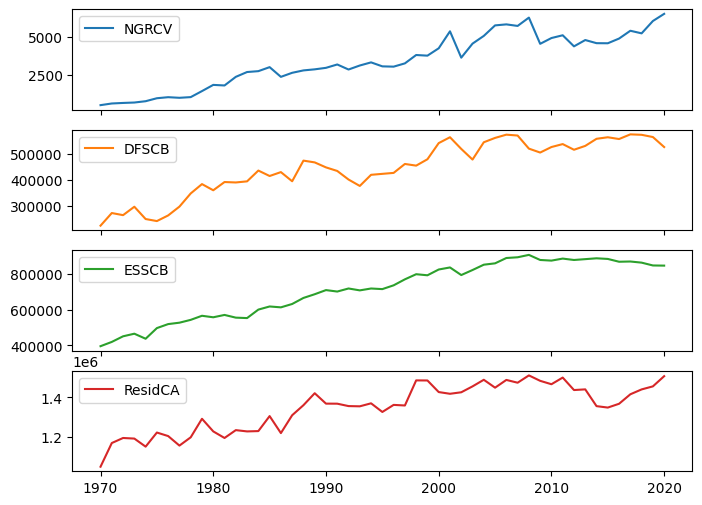

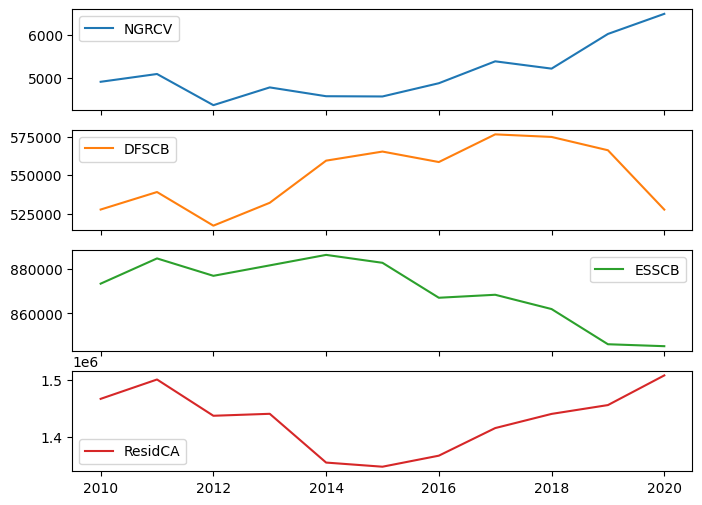

In [7]:
plot_cols = ['NGRCV', 'DFSCB', 'ESSCB',"ResidCA"]
plot_features = df[plot_cols]
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][40:]
_ = plot_features.plot(subplots=True)

In [8]:
# split train validate and test as 80% 20% 0%

column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.8)]
val_df = df[int(n*0.8):int(n*1)]
test_df = df[int(n*1):]

num_features = df.shape[1]

train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

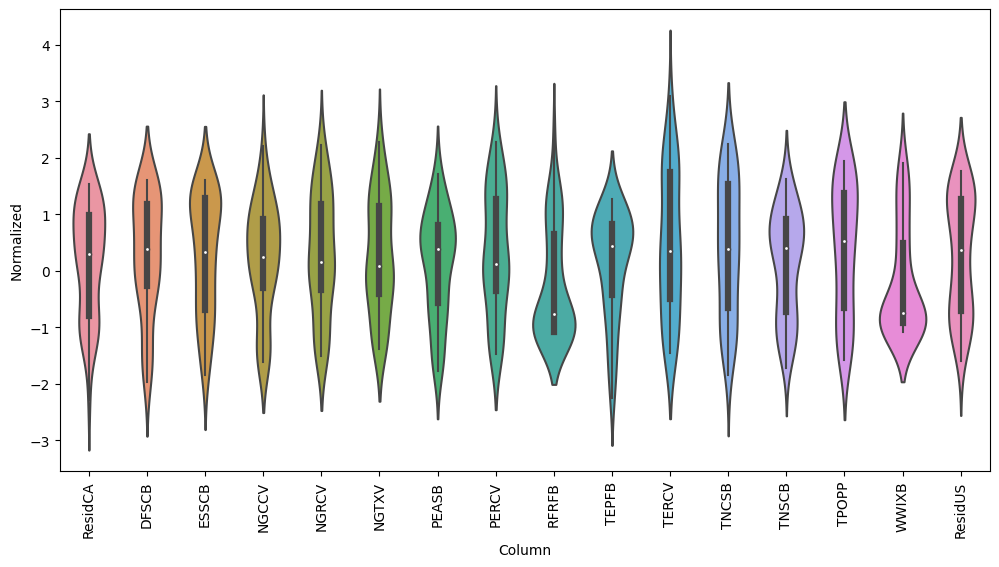

In [9]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [10]:
train_df.head()

,ResidCA,DFSCB,ESSCB,NGCCV,NGRCV,NGTXV,PEASB,PERCV,RFRFB,TEPFB,TERCV,TNCSB,TNSCB,TPOPP,WWIXB,ResidUS
1970,-2.281927,-1.970565,-1.850668,-1.609624,-1.499682,-1.374696,-1.763851,-1.464255,1.247108,-2.241090,-1.457063,-1.835721,-1.711027,-1.580071,1.037293,-1.600979
1971,-1.291750,-1.475795,-1.689254,-1.570389,-1.431934,-1.337653,-1.593804,-1.404729,0.275521,-2.098044,-1.418085,-1.274812,-1.348970,-1.518927,1.087278,-1.401999
1972,-1.080780,-1.558672,-1.477393,-1.561503,-1.409874,-1.323092,-1.541868,-1.387105,0.190989,-1.706082,-1.391708,-1.441449,-1.294241,-1.475820,1.320691,-1.133163
1973,-1.105787,-1.228954,-1.379068,-1.547969,-1.392827,-1.304667,-1.421783,-1.365062,1.080031,-1.427714,-1.361058,-1.286367,-1.109291,-1.424597,1.426035,-1.109285
1974,-1.442923,-1.710594,-1.569535,-1.508049,-1.339180,-1.258109,-1.618613,-1.310610,0.982811,-1.647346,-1.290689,-1.450963,-1.411189,-1.369586,1.529549,-1.219771


In [11]:
train_X = train_df.iloc[:,1:]
train_y = train_df.iloc[:,1]
train_X
valid_X = val_df.iloc[:,1:]
valid_y = val_df.iloc[:,1]


In [12]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [13]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['ResidCA'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['ResidCA']

In [14]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['ResidCA'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['ResidCA']

In [15]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window 

In [16]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[10:10+w2.total_window_size]),
                           np.array(train_df[20:20+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 16)
Inputs shape: (3, 6, 16)
Labels shape: (3, 1, 1)


In [17]:
w2.example = example_inputs, example_labels

In [18]:
def plot(self, model=None, plot_col='ResidCA', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

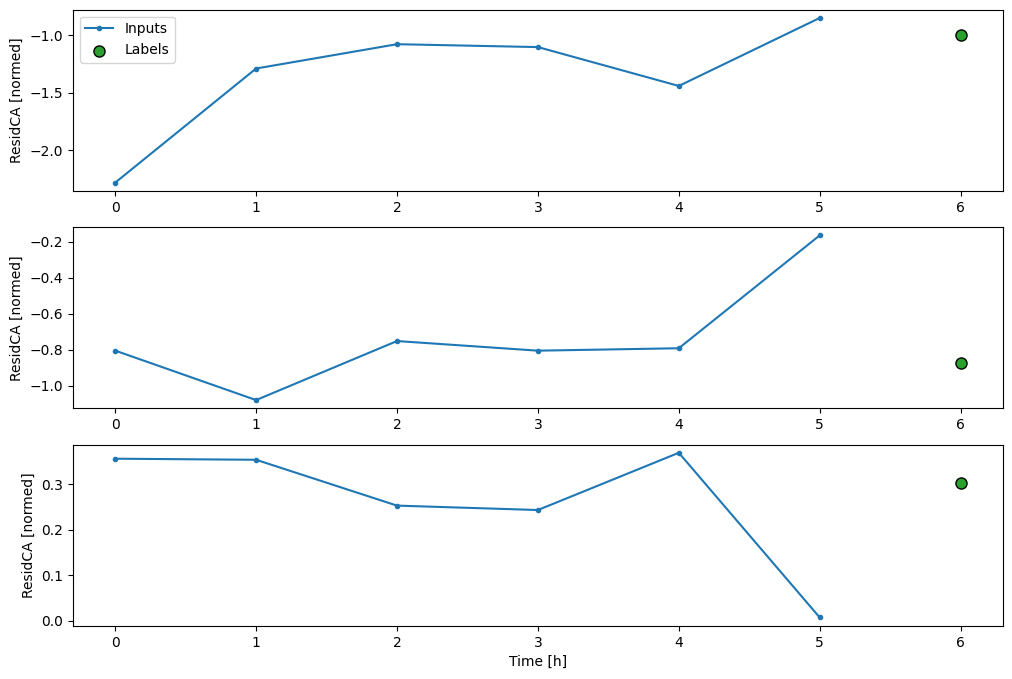

In [19]:
w2.plot()

In [20]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=False,
      # batch_size=32,
      )

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [21]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [22]:
# Each element is an (inputs, label) pair.
w2.train.element_spec

(TensorSpec(shape=(None, 6, 16), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [23]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (34, 6, 16)
Labels shape (batch, time, features): (34, 1, 1)


single step models

In [24]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['ResidCA'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['ResidCA']

In [25]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (39, 1, 16)
Labels shape (batch, time, features): (39, 1, 1)


In [26]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [27]:
baseline = Baseline(label_index=column_indices['ResidCA'])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
# performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

1/1 [==============================] - 0s 151ms/step - loss: 0.1267 - mean_absolute_error: 0.2901


In [28]:
wide_window = WindowGenerator(
    input_width=5, label_width=5, shift=1,
    label_columns=['ResidCA'])

wide_window

Total window size: 6
Input indices: [0 1 2 3 4]
Label indices: [1 2 3 4 5]
Label column name(s): ['ResidCA']

In [29]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (35, 5, 16)
Output shape: (35, 5, 1)


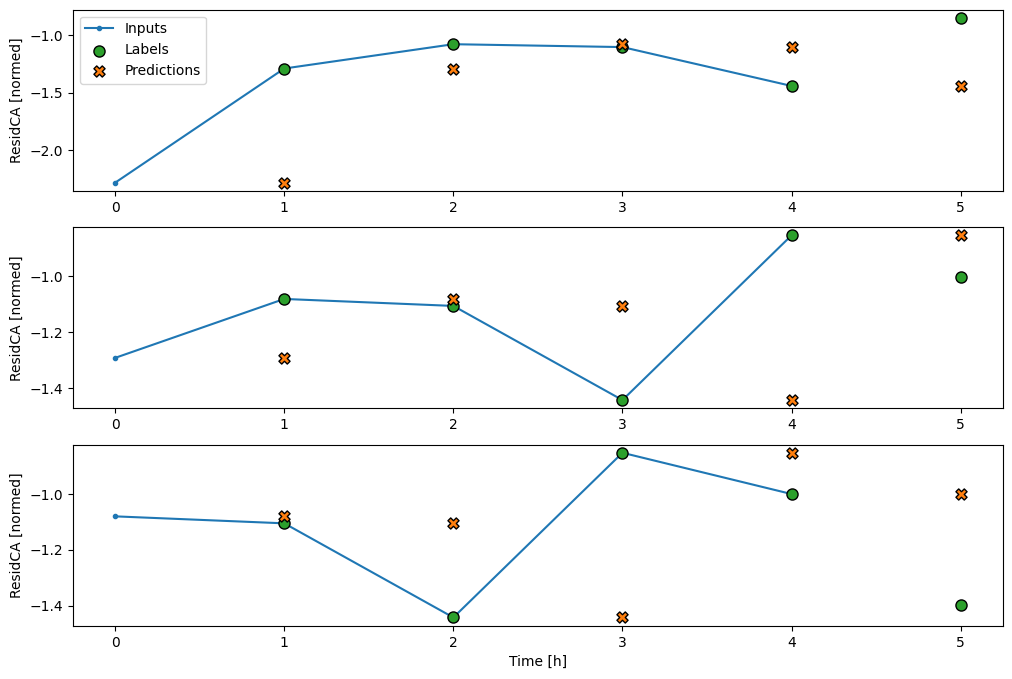

In [30]:
wide_window.plot(baseline)

In [31]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [32]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (39, 1, 16)
Output shape: (39, 1, 1)


In [33]:
MAX_EPOCHS = 200

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [34]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
# performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/200
1/1 [==============================] - 0s 435ms/step - loss: 0.5657 - mean_absolute_error: 0.6260 - val_loss: 0.1330 - val_mean_absolute_error: 0.2867
Epoch 2/200
1/1 [==============================] - 0s 45ms/step - loss: 0.5482 - mean_absolute_error: 0.6156 - val_loss: 0.1318 - val_mean_absolute_error: 0.2860
Epoch 3/200
1/1 [==============================] - 0s 44ms/step - loss: 0.5312 - mean_absolute_error: 0.6057 - val_loss: 0.1314 - val_mean_absolute_error: 0.2852
Epoch 4/200
1/1 [==============================] - 0s 42ms/step - loss: 0.5146 - mean_absolute_error: 0.5962 - val_loss: 0.1319 - val_mean_absolute_error: 0.2844
Epoch 5/200
1/1 [==============================] - 0s 48ms/step - loss: 0.1333 - mean_absolute_error: 0.2856


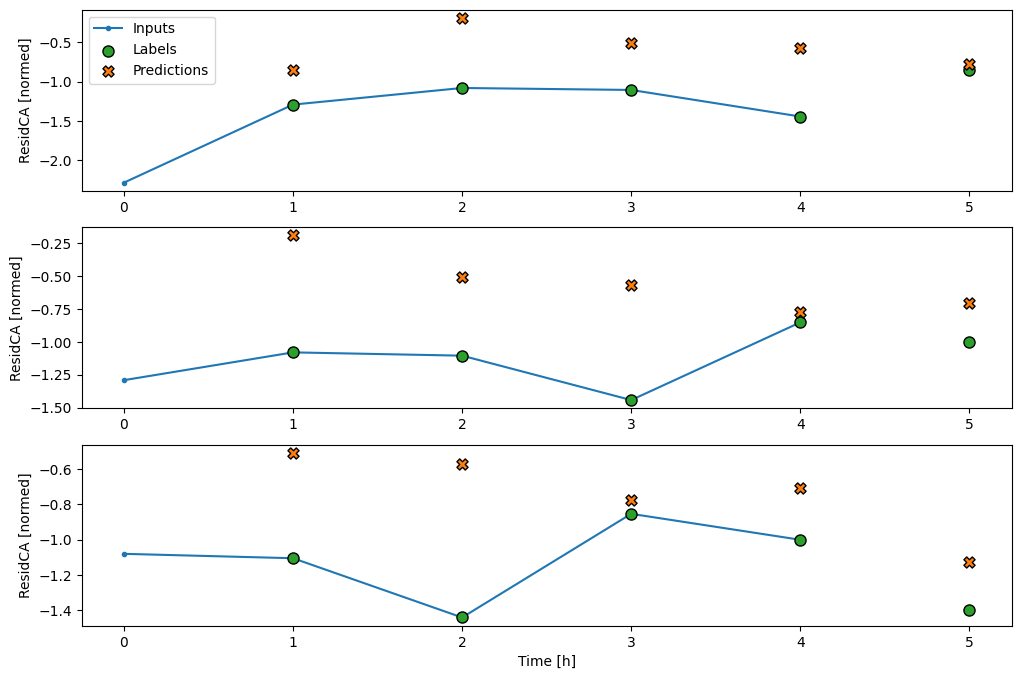

In [35]:
wide_window.plot(linear)

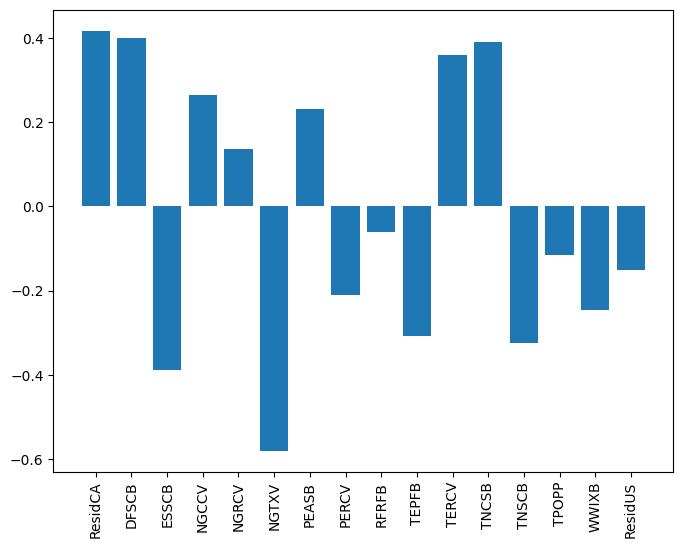

In [36]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

In [37]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
# performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/200
1/1 [==============================] - 1s 747ms/step - loss: 0.9584 - mean_absolute_error: 0.7713 - val_loss: 2.2053 - val_mean_absolute_error: 1.4105
Epoch 2/200
1/1 [==============================] - 0s 43ms/step - loss: 0.9192 - mean_absolute_error: 0.7471 - val_loss: 2.1131 - val_mean_absolute_error: 1.3780
Epoch 3/200
1/1 [==============================] - 0s 43ms/step - loss: 0.8850 - mean_absolute_error: 0.7268 - val_loss: 2.0272 - val_mean_absolute_error: 1.3470
Epoch 4/200
1/1 [==============================] - 0s 43ms/step - loss: 0.8548 - mean_absolute_error: 0.7120 - val_loss: 1.9424 - val_mean_absolute_error: 1.3155
Epoch 5/200
1/1 [==============================] - 0s 43ms/step - loss: 0.8284 - mean_absolute_error: 0.6999 - val_loss: 1.8589 - val_mean_absolute_error: 1.2838
Epoch 6/200
1/1 [==============================] - 0s 45ms/step - loss: 0.8049 - mean_absolute_error: 0.6890 - val_loss: 1.7767 - val_mean_absolute_error: 1.2519
Epoch 7/200
1/1 [==========

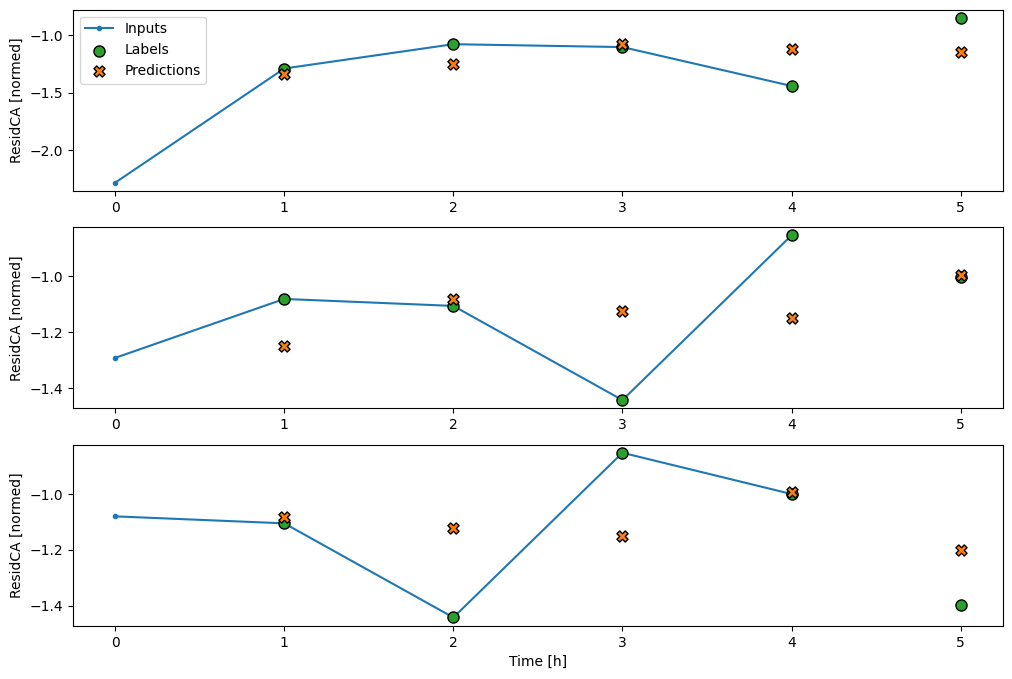

In [38]:
wide_window.plot(dense)

multi step dense

In [39]:
CONV_WIDTH = 5
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['ResidCA'])

conv_window

Total window size: 6
Input indices: [0 1 2 3 4]
Label indices: [5]
Label column name(s): ['ResidCA']

Text(0.5, 1.0, 'Given 3 hours of inputs, predict 1 hour into the future.')

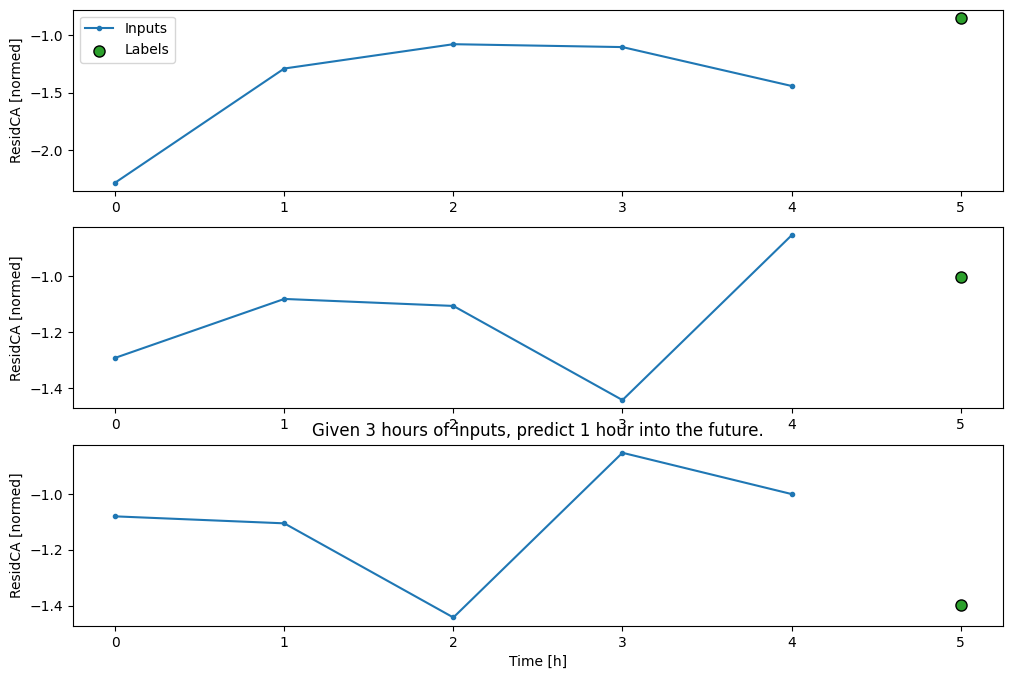

In [40]:
conv_window.plot()
plt.title("Given 3 hours of inputs, predict 1 hour into the future.")

In [41]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=4, activation='relu'),
    tf.keras.layers.Dense(units=2, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [42]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (35, 5, 16)
Output shape: (35, 1, 1)


In [43]:
history = compile_and_fit(multi_step_dense, conv_window)

# IPython.display.clear_output()


Epoch 1/200
1/1 [==============================] - 1s 600ms/step - loss: 0.4788 - mean_absolute_error: 0.5437 - val_loss: 0.2107 - val_mean_absolute_error: 0.3867
Epoch 2/200
1/1 [==============================] - 0s 44ms/step - loss: 0.4671 - mean_absolute_error: 0.5354 - val_loss: 0.2119 - val_mean_absolute_error: 0.3878
Epoch 3/200
1/1 [==============================] - 0s 44ms/step - loss: 0.4564 - mean_absolute_error: 0.5282 - val_loss: 0.2107 - val_mean_absolute_error: 0.3877
Epoch 4/200
1/1 [==============================] - 0s 44ms/step - loss: 0.4458 - mean_absolute_error: 0.5213 - val_loss: 0.2081 - val_mean_absolute_error: 0.3867
Epoch 5/200
1/1 [==============================] - 0s 45ms/step - loss: 0.4366 - mean_absolute_error: 0.5152 - val_loss: 0.2047 - val_mean_absolute_error: 0.3851
Epoch 6/200
1/1 [==============================] - 0s 44ms/step - loss: 0.4285 - mean_absolute_error: 0.5098 - val_loss: 0.2013 - val_mean_absolute_error: 0.3835
Epoch 7/200
1/1 [==========

In [44]:
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
# performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

1/1 [==============================] - 0s 46ms/step - loss: 0.1818 - mean_absolute_error: 0.3685


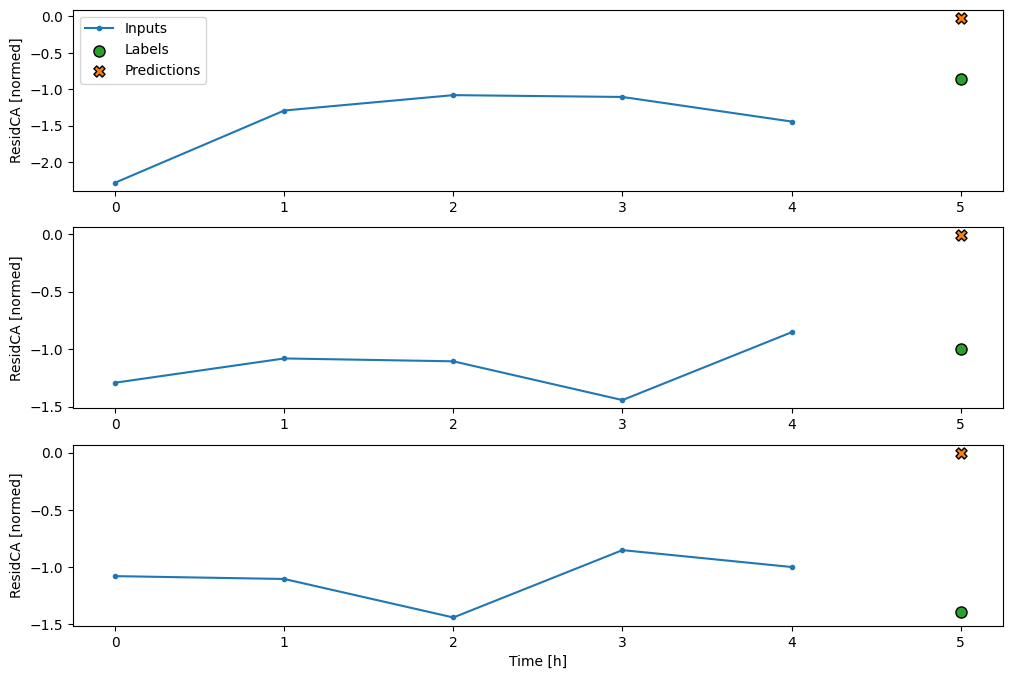

In [45]:
conv_window.plot(multi_step_dense)

In [46]:
print('Input shape:', wide_window.example[0].shape)
try:
  print('Output shape:', multi_step_dense(wide_window.example[0]).shape)
except Exception as e:
  print(f'\n{type(e).__name__}:{e}')

Input shape: (35, 5, 16)
Output shape: (35, 1, 1)


In [47]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=8,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=4, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [48]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (35, 5, 16)
Output shape: (35, 1, 1)


In [49]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
# performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

1/1 [==============================] - 0s 47ms/step - loss: 0.8443 - mean_absolute_error: 0.8057


In [50]:
val_performance
# print(performance)

{'Baseline': [0.12674733996391296, 0.29013463854789734],
 'Linear': [0.13330203294754028, 0.2855899930000305],
 'Dense': [0.15972086787223816, 0.3132927715778351],
 'Multi step dense': [0.18175029754638672, 0.3685108721256256],
 'Conv': [0.8442659378051758, 0.8056560158729553]}

In [51]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (35, 5, 16)
Labels shape: (35, 5, 1)
Output shape: (35, 1, 1)


In [52]:
LABEL_WIDTH = 2
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['ResidCA'])

wide_conv_window

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [5 6]
Label column name(s): ['ResidCA']

In [53]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (34, 6, 16)
Labels shape: (34, 2, 1)
Output shape: (34, 2, 1)


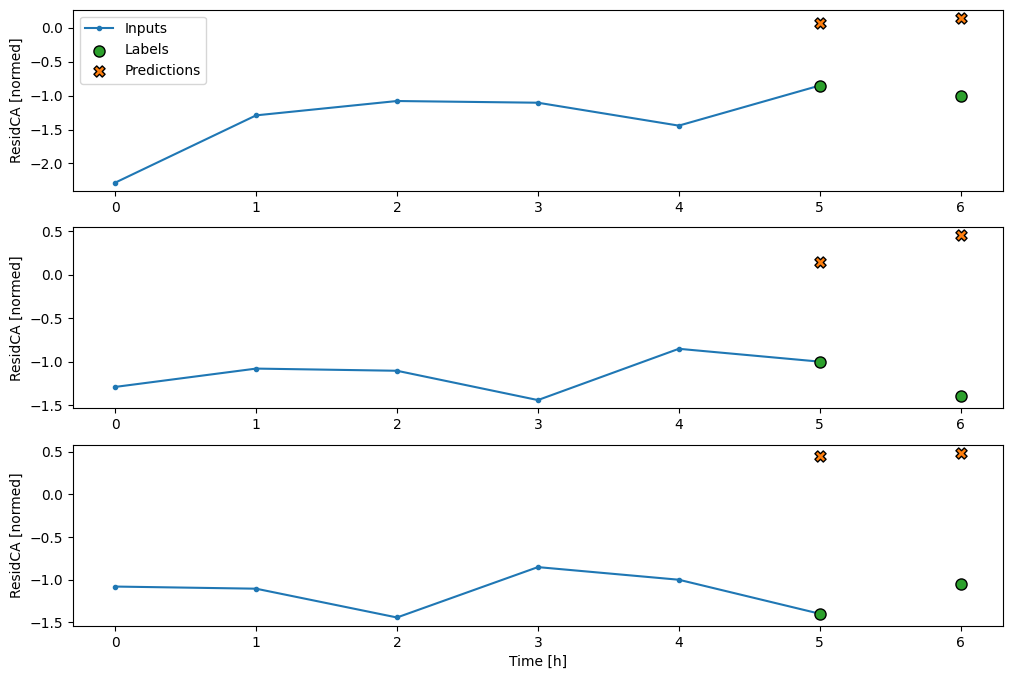

In [54]:
wide_conv_window.plot(conv_model)

In [55]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(8, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [56]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (35, 5, 16)
Output shape: (35, 5, 1)


In [57]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()

val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
# performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

1/1 [==============================] - 0s 47ms/step - loss: 0.1675 - mean_absolute_error: 0.3534


In [58]:
val_performance

{'Baseline': [0.12674733996391296, 0.29013463854789734],
 'Linear': [0.13330203294754028, 0.2855899930000305],
 'Dense': [0.15972086787223816, 0.3132927715778351],
 'Multi step dense': [0.18175029754638672, 0.3685108721256256],
 'Conv': [0.8442659378051758, 0.8056560158729553],
 'LSTM': [0.16747741401195526, 0.35340768098831177]}